# The Age of Abalone

#####  
The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope, which is a boring and time consuming process.

In [303]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [339]:
df=pd.read_csv(r'C:\Users\tusha\Downloads\abalone.csv')
df

Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
...   ..     ...       ...     ...           ...             ...   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera weight  Shell weight  Rings  
0             0.1010        0.1500     15  
1             0.0485        0.0700      7  
2             0.1415        0.2100      9  
3             0.1140        0.1550     10  
4             0.0395        0.0550      7  
...              ...           ...    ...  
4172          0.2390        0.2490     11  
4173          0.2145        0.2605     10  
4174          0.2875        0.3080      9  
4175          0.2610        0.2960     10  
4176          0.3765        0.4950     12  

[4177 rows x 9 columns]

In [424]:
# This will tell the no. of rows and columns
df.shape

(4177, 9)

In [425]:
# There are 4177 rows and 9 columns.

In [341]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [426]:
# there is no null values.
# sex is object type datatype
# ring is integer type and rest other are float type datatypes.

In [342]:

df.describe()

Length     Diameter       Height  Whole weight  Shucked weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean      0.523992     0.407881     0.139516      0.828742        0.359367   
std       0.120093     0.099240     0.041827      0.490389        0.221963   
min       0.075000     0.055000     0.000000      0.002000        0.001000   
25%       0.450000     0.350000     0.115000      0.441500        0.186000   
50%       0.545000     0.425000     0.140000      0.799500        0.336000   
75%       0.615000     0.480000     0.165000      1.153000        0.502000   
max       0.815000     0.650000     1.130000      2.825500        1.488000   

       Viscera weight  Shell weight        Rings  
count     4177.000000   4177.000000  4177.000000  
mean         0.180594      0.238831     9.933684  
std          0.109614      0.139203     3.224169  
min          0.000500      0.001500     1.000000  
25%          0.093500      0.130000     8.000000  
50%          0.171000      0.234000     9.000000  
75%          0.253000      0.329000    11.000000  
max          0.760000      1.005000    29.000000

In [429]:
# from count we can see that there are no missing values.
# mean and median are approximately same.
# describe only shows the continous data, it won't show the categorical data.


# Sex column is missing as we know that it isn't continous data.
### from above chart we can conclude that the height feature has minimum value zero. 
# from that we can say that the height feature has missing value

In [343]:
# applying label encoder to convert categorical variable to numeric variable with label encoder to make uniform data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex']= le.fit_transform(df['Sex'])
df.head()

Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0    2   0.455     0.365   0.095        0.5140          0.2245   
1    2   0.350     0.265   0.090        0.2255          0.0995   
2    0   0.530     0.420   0.135        0.6770          0.2565   
3    2   0.440     0.365   0.125        0.5160          0.2155   
4    1   0.330     0.255   0.080        0.2050          0.0895   

   Viscera weight  Shell weight  Rings  
0          0.1010         0.150     15  
1          0.0485         0.070      7  
2          0.1415         0.210      9  
3          0.1140         0.155     10  
4          0.0395         0.055      7

In [430]:
df.isna().any()
# is used to check the categorical data.


Sex               False
Length            False
Diameter          False
Height            False
Whole weight      False
Shucked weight    False
Viscera weight    False
Shell weight      False
Rings             False
dtype: bool

In [431]:
# from this we didn't got the missing value.
# no categories are missing.

In [311]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [312]:
# from this also we didn't got the missing value
# now its time to process the data.

In [313]:
(df.Height==0).sum()

2

In [314]:
# filtering the outliers

In [315]:
# this shows that height feature has two missing values.

In [316]:
df[df["Height"]==0]

Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
1257    1   0.430      0.34     0.0         0.428          0.2065   
3996    1   0.315      0.23     0.0         0.134          0.0575   

      Viscera weight  Shell weight  Rings  
1257          0.0860        0.1150      8  
3996          0.0285        0.3505      6

In [317]:
# from this we can see that two infant has height zero.
# now we can fill the missing value with the average height of the infant abalone.

### Removing the outliers.

In [318]:
means=pd.pivot_table(df, index=['Sex'], aggfunc={'Height':np.mean})
means

Height
Sex          
0    0.158011
1    0.107996
2    0.151381

In [319]:
# form this we can say that the average height of infant is 0.107996
# now we can fill this value in the missing value of infant.

In [320]:
df["Height"]= df["Height"].replace(to_replace=0, value=0.107996)

## Univariate analysis

#####   
In this we have to analyse every attribute individually. we have to analyze the distributed target attribute Rings, and other attributes are divided for convenience of the analysis.
Quantative or continous attributes are analysed by histograms and boxplots but categorical are analyzed with the help of barplots.

### Target attribute (Rings)

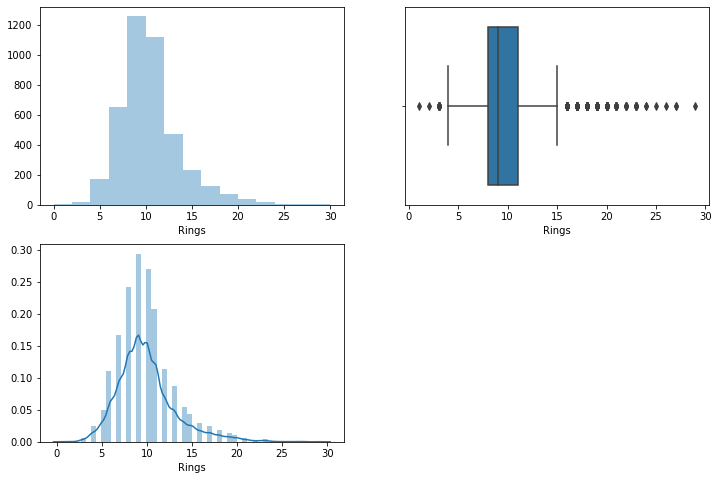

In [321]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(df['Rings'], kde=False, bins=range(0, 31, 2));
plt.subplot(2,2,2)
sns.boxplot(df['Rings']);
plt.subplot(2,2,3)
sns.distplot(df['Rings']);

In [322]:
# It can be claerly seen that there are outlier in the Rings columns
# Now we have to remove the outliers from the Rings columns.

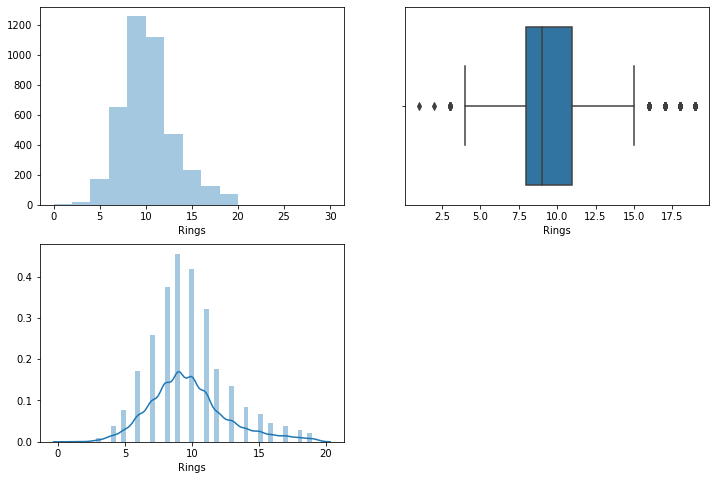

In [432]:
df = df[df['Rings'] < 20]
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(df['Rings'], kde=False, bins=range(0, 31, 2));
plt.subplot(2,2,2)
sns.boxplot(df['Rings']);
plt.subplot(2,2,3)
sns.distplot(df['Rings']);

In [324]:
# upto some extent outliers have been removed from the dataset.

###  Size attribute

In [325]:
# it denotes the size of the abalone which includes length, height and daimeter.
# here we have to check the outlier.

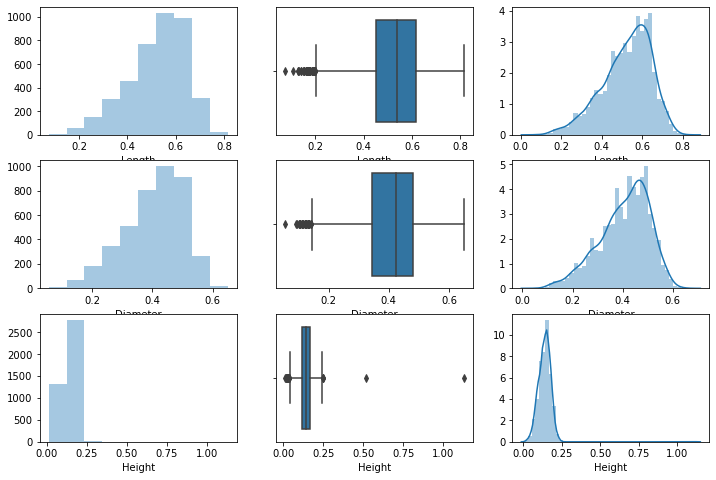

In [326]:
plt.figure(figsize=(12,8))
plt.subplot(3,3,1)
sns.distplot(df['Length'], kde=False, bins= 10);
plt.subplot(3,3,2)
sns.boxplot(df['Length']);
plt.subplot(3,3,3)
sns.distplot(df['Length']);

plt.subplot(3,3,4)
sns.distplot(df['Diameter'], kde=False, bins = 10);
plt.subplot(3,3,5)
sns.boxplot(df['Diameter']);
plt.subplot(3,3,6)
sns.distplot(df['Diameter']);

plt.subplot(3,3,7)
sns.distplot(df['Height'], kde=False, bins= 10);
plt.subplot(3,3,8)
sns.boxplot(df['Height']);
plt.subplot(3,3,9)
sns.distplot(df['Height']);

In [327]:
# from this it can be observer that there are outlier present in size also.
# we have to filter out these outliers.

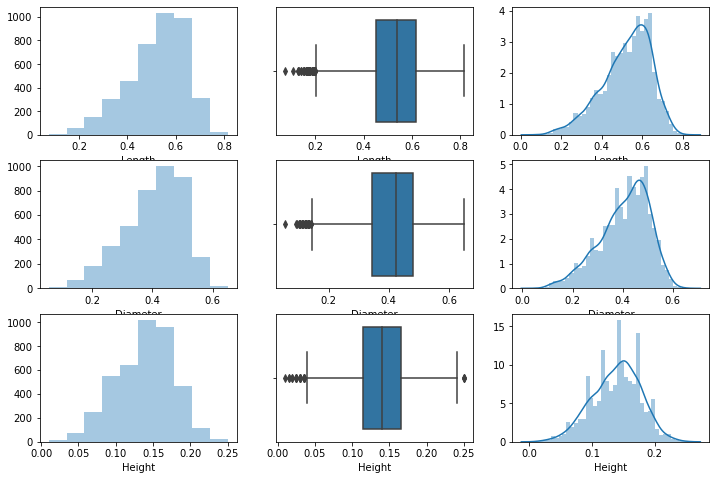

In [328]:
df = df[df['Height'] < 0.4]
plt.figure(figsize=(12,8))
plt.subplot(3,3,1)
sns.distplot(df['Length'], kde=False, bins= 10);
plt.subplot(3,3,2)
sns.boxplot(df['Length']);
plt.subplot(3,3,3)
sns.distplot(df['Length']);

plt.subplot(3,3,4)
sns.distplot(df['Diameter'], kde=False, bins= 10);
plt.subplot(3,3,5)
sns.boxplot(df['Diameter']);
plt.subplot(3,3,6)
sns.distplot(df['Diameter']);

plt.subplot(3,3,7)
sns.distplot(df['Height'], kde=False, bins = 10);
plt.subplot(3,3,8)
sns.boxplot(df['Height']);
plt.subplot(3,3,9)
sns.distplot(df['Height']);

### Weight attribute 

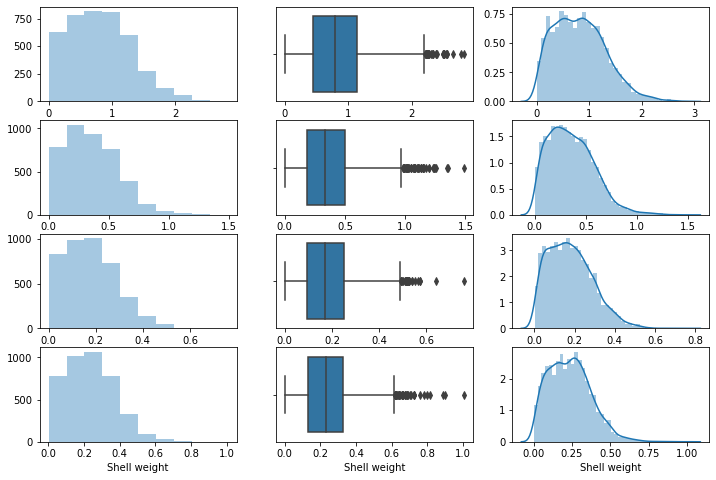

In [329]:
plt.figure(figsize=(12,8))
#figsize  tells the width and height of the figure
plt.subplot(4,3,1)
sns.distplot(df['Whole weight'], kde=False, bins= 10);
plt.subplot(4,3,2)
sns.boxplot(df['Whole weight']);
plt.subplot(4,3,3)
sns.distplot(df['Whole weight']);

plt.subplot(4,3,4)
sns.distplot(df['Shucked weight'], kde=False, bins= 10);
plt.subplot(4,3,5)
sns.boxplot(df['Shucked weight']);
plt.subplot(4,3,6)
sns.distplot(df['Shucked weight']);

plt.subplot(4,3,7)
sns.distplot(df['Viscera weight'], kde=False, bins= 10);
plt.subplot(4,3,8)
sns.boxplot(df['Viscera weight']);
plt.subplot(4,3,9)
sns.distplot(df['Viscera weight']);

plt.subplot(4,3,10)
sns.distplot(df['Shell weight'], kde=False, bins= 10);
plt.subplot(4,3,11)
sns.boxplot(df['Shell weight']);
plt.subplot(4,3,12)
sns.distplot(df['Shell weight']);

In [330]:
# rings are the main factor on which depends all depends
# rings increases wieght, size increases.

### Categorical attribute (sex)

In [331]:
df['Sex'].value_counts()

2    1500
1    1339
0    1274
Name: Sex, dtype: int64

In [332]:
# we can take a note of it that 1528 are male, 1342 are infant and 1307 are female.
# various outlier have been removed
# so now valule of females, males and infants ahve been reduced.

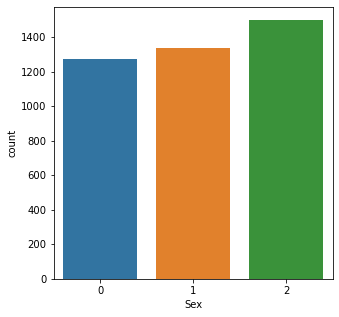

In [333]:
plt.figure(figsize=(5,5))
df=sns.countplot(df.Sex)

In [334]:
#by this we can observe the values of male, female and infant.
# from this we can conclude that the the population of male is greater than female and infant

##  Multivariate analysis

In [335]:
# In this we will check the correlation between various features.

In [336]:
# plotting correlation matrix

In [345]:
df.corr()

Sex    Length  Diameter    Height  Whole weight  \
Sex             1.000000 -0.036066 -0.038874 -0.042077     -0.021391   
Length         -0.036066  1.000000  0.986812  0.827554      0.925261   
Diameter       -0.038874  0.986812  1.000000  0.833684      0.925452   
Height         -0.042077  0.827554  0.833684  1.000000      0.819221   
Whole weight   -0.021391  0.925261  0.925452  0.819221      1.000000   
Shucked weight -0.001373  0.897914  0.893162  0.774972      0.969405   
Viscera weight -0.032067  0.903018  0.899724  0.798319      0.966375   
Shell weight   -0.034854  0.897706  0.905330  0.817338      0.955355   
Rings          -0.034627  0.556720  0.574660  0.557467      0.540390   

                Shucked weight  Viscera weight  Shell weight     Rings  
Sex                  -0.001373       -0.032067     -0.034854 -0.034627  
Length                0.897914        0.903018      0.897706  0.556720  
Diameter              0.893162        0.899724      0.905330  0.574660  
Height                0.774972        0.798319      0.817338  0.557467  
Whole weight          0.969405        0.966375      0.955355  0.540390  
Shucked weight        1.000000        0.931961      0.882617  0.420884  
Viscera weight        0.931961        1.000000      0.907656  0.503819  
Shell weight          0.882617        0.907656      1.000000  0.627574  
Rings                 0.420884        0.503819      0.627574  1.000000

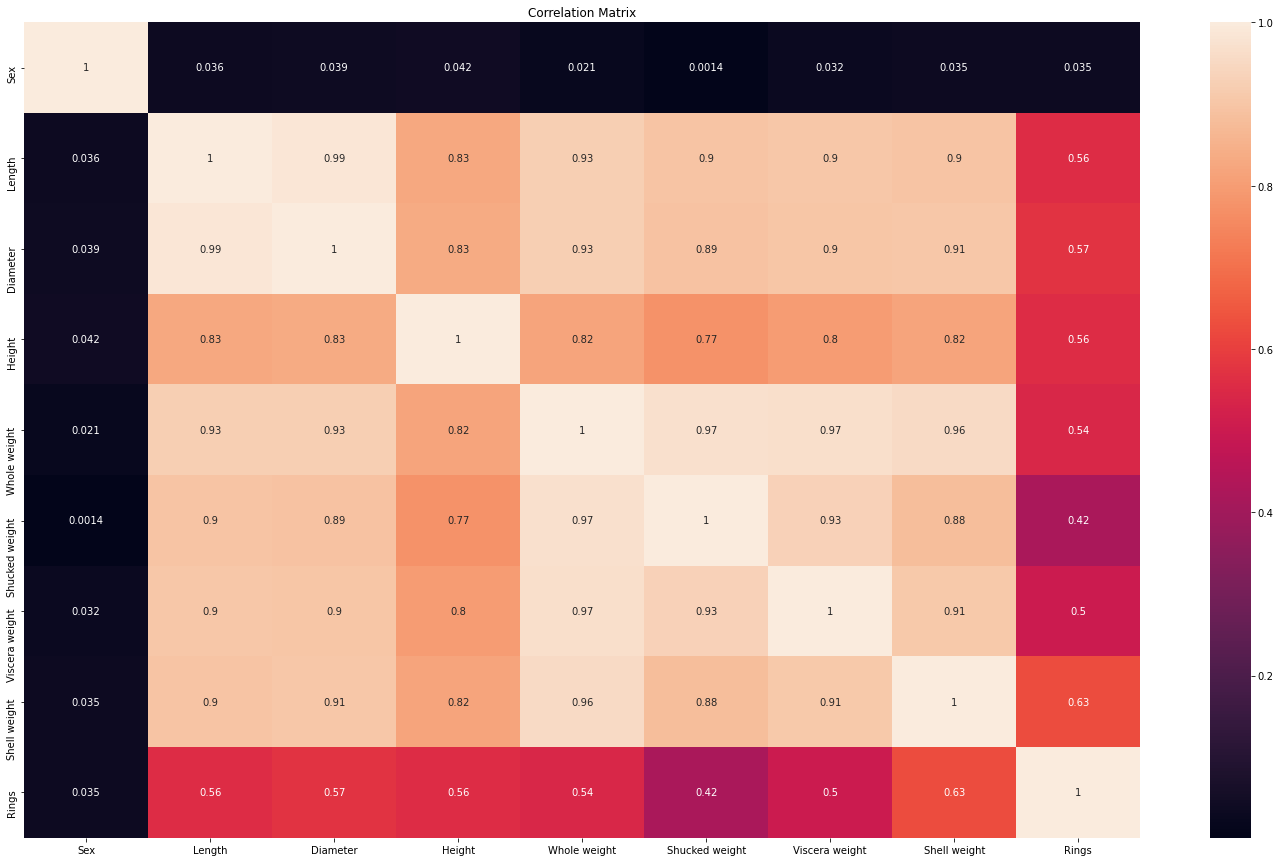

In [346]:
corr_mat = df.corr().abs()
plt.figure(figsize=[25,15])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

In [347]:
# splitting the data into 3 parts train, test, validation. 

In [348]:
X=df.drop('Rings', axis=1)
y=df['Rings']

In [349]:
# importing the required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score


In [350]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.25, random_state= 41)

In [351]:
def models(X_train, y_train):
    
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state =0)
    log.fit(X_train,y_train)
    
    from sklearn.neighbors import KNeighborsClassifier
    knn=KNeighborsClassifier(n_neighbors =5, metric = 'minkowski' , p=2)
    knn.fit(X_train,y_train)
    
    from sklearn.svm import SVC
    svc_lin = SVC(kernel = 'linear', random_state = 0)
    svc_lin.fit(X_train, y_train)
    
    from sklearn.svm import SVC
    svc_rbf = SVC(kernel = 'rbf', random_state=0)
    svc_rbf.fit(X_train, y_train)
    
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion ='entropy', random_state=0)
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state=0)
    forest.fit(X_train,y_train)
    
    print('[0]LR Accuracy: ' , log.score(X_train,y_train))
    print('[1]KNN Accuracy: ' , knn.score(X_train,y_train))
    print('[2]SVM (Linear Classifier) Accuracy: ',  svc_lin.score(X_train,y_train))
    print('[3]SVM (RBF Classifier) Accuracy: ' , svc_rbf.score(X_train,y_train))
    print('[4]RFC Accuracy: ' , forest.score(X_train,y_train)) 
    
    return log, knn, svc_lin, svc_rbf,forest

In [352]:
model= models(X_train, y_train)

[0]LR Accuracy:  0.2707535121328225
[1]KNN Accuracy:  0.4495530012771392
[2]SVM (Linear Classifier) Accuracy:  0.2621328224776501
[3]SVM (RBF Classifier) Accuracy:  0.26979565772669223
[4]RFC Accuracy:  0.9833971902937421


In [ ]:
# the accuracy of Logistic regression, KNN model , svm(linear classifier), svm(rbf), and random forest classifier is shown while trainning.

In [420]:
# logistic is used to find the most optimal equation of a line that separates the dataset points.

In [423]:
# Initializing classifier with one-v-rest approach. random_state is # to ensure same results in every execution.
lr = LogisticRegression(multi_class = 'ovr', random_state=3)
# training classifier
lr.fit(X_train, y_train)
# Evaluate the classifier
print(lr.score(X_test, y_test))

0.2516746411483254


In [418]:
# knn is to check the nearest neighbors

In [422]:
# Initializing classifier and giving hyperparameter k=3
knn = KNeighborsClassifier(n_neighbors=3)
# training classifier
knn.fit(X_train, y_train)
# Evaluating the classifier
print(knn.score(X_test, y_test))
# checking what happens when we change the hyperparameter
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

print(knn.score(X_test, y_test))

0.21244019138755982
0.21818181818181817


In [353]:
# Let's first visualize the tree on the data without doing any pre processing
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

####  Let's see how the tree looks like (This has nothing to do with the algorithm/accuracy). It's just for visualization purpose.

In [354]:
feature_name = list(X.columns)
class_name = list(y_train.unique())
feature_name

['Sex',
 'Length',
 'Diameter',
 'Height',
 'Whole weight',
 'Shucked weight',
 'Viscera weight',
 'Shell weight']

In [355]:
####  Let's see how the tree looks like (This has nothing to do with the algorithm/accuracy). It's just for visualization purpose.

feature_name = list(X.columns)
class_name = list(y_train.unique())
feature_name

['Sex',
 'Length',
 'Diameter',
 'Height',
 'Whole weight',
 'Shucked weight',
 'Viscera weight',
 'Shell weight']

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.155367 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.155367 to fit



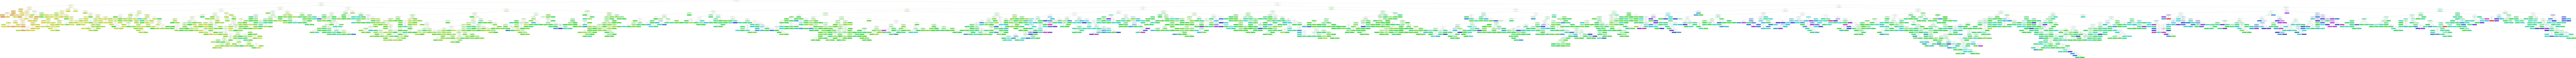

In [356]:
import graphviz
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import Image
import pydotplus


# create a dot_file which stores the tree structure
dot_data = export_graphviz(clf,feature_names = feature_name,rounded = True, filled = True)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('tree1.png')
# show graph
Image(graph.create_png())

In [433]:
# above is the decision tree 

In [357]:
clf.score(x_train,y_train)

1.0

In [358]:
# to check the training score
#its 100% which is great

In [359]:
y_pred = clf.predict(x_test)

In [360]:
# to predicting and passing the test data

In [361]:
# accuracy of our classifier tree
clf.score(x_test,y_test)

0.18851674641148325

In [362]:
# test score is 19.04% 
# maybe i will be able to improve the test score after hyperparameter tuning.

### How to understand confusion_matrix for multi class

In [363]:
confusion_matrix(y_test,y_pred)

array([[ 0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  3,  4,  7,  3,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  2,  1,  9,  5,  3,  1,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  4, 14, 19, 16,  6,  2,  2,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  2,  6, 19, 26, 24, 17,  7,  1,  0,  2,  0,  0,  1,
         0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  8, 21, 29, 26, 17, 10,  3,  7,  1,  5,  0,
         2,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  3, 12, 34, 41, 34, 19,  6,  7,  5, 

In [364]:
# plotting the confusion matrix

# the above result is confusing so improve the result to understand.

## Hyperparameters

In [365]:
# criterion=' gini' it will keep features in priority based on the information or gini impurity
#  the first one will keep most number of feature with itself and the last one will keep least information.
# maximum feature= None    it means it will only keep 20 features only from top, as they are contributing most.
# features can also be tunes i.e. we will keep which is needed otherwise we will not include which is not required
#  maximum leaf node=None   leaf nodes we can keep in the tree.. it can be controlled as well.
# min samples      can be controlled, we can set the no. of samples we can put the stopper to stop growing the no. of samples to prevent from growing.
# as it takes time for executing more samples.


In [366]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    'criterion': ['gini','entropy'],
    'max_depth' : range(2,10,3),
    'min_samples_leaf' : range(2,10,2),
    'min_samples_split': range(2,10,2)
}

# range is (2,10,3)

In [367]:
grid_search = GridSearchCV(estimator=clf,
                          param_grid=grid_param,
                          cv=5,
                          n_jobs =-1)

# cv=5   five times cross validation and try to find the best combination.
# n_jobs=-1   it will engage  all the cores of the system to find the grid params so that it will decrese the time


In [368]:
grid_search.fit(x_train,y_train)

# to pass the training data.

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10, 3),
                         'min_samples_leaf': range(2, 10, 2),
                         'min_samples_split': range(2, 10, 2)})

In [369]:
# to find the best parameters

best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 6, 'min_samples_split': 2}


###  Hyperparameter  tunings doesn't  always improves the accuracy  but more than 90% it will increse the accuracy, but not 100%.

In [370]:
# it can be seen that gini criterion is used , maximum depth used is 2, min_samples_leaf used is 2 and min_sample_split used is 2.
# above these parameters are in the range which has been provided.
# different range gives different results.

In [371]:
clf = DecisionTreeClassifier(criterion = 'gini', max_depth =2, min_samples_leaf=1, min_samples_split = 2)
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.24688995215311005

In [372]:
# train the data and also test the data
# from the test result we got 24.68 % which is so bad 
# before the hyperparameter the test result was  19.04 %
# it can be concluded that the range given is not the right range.
# now try to change the range of grid search.

In [373]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    'criterion': ['gini','entropy'],
    'max_depth' : range(3,12,3),
    'min_samples_leaf' : range(3,12,2),
    'min_samples_split': range(4,10,2)
}

# range is (2,10,3)
# for large dataset we have to increase the range also.

In [374]:
grid_search = GridSearchCV(estimator=clf,
                          param_grid=grid_param,
                          cv=5,
                          n_jobs =-1)

# cv=5   five times cross validation and try to find the best combination.
# n_jobs=-1   it will engage  all the cores of the system to find the grid params so that it will decrese the time


In [375]:
grid_search.fit(x_train,y_train)

# to pass the training data.

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=2), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(3, 12, 3),
                         'min_samples_leaf': range(3, 12, 2),
                         'min_samples_split': range(4, 10, 2)})

In [376]:
# to find the best parameters

best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 11, 'min_samples_split': 4}


In [377]:
y_pred = clf.predict(x_test)

In [378]:
accuracy_score(y_test,y_test)

1.0

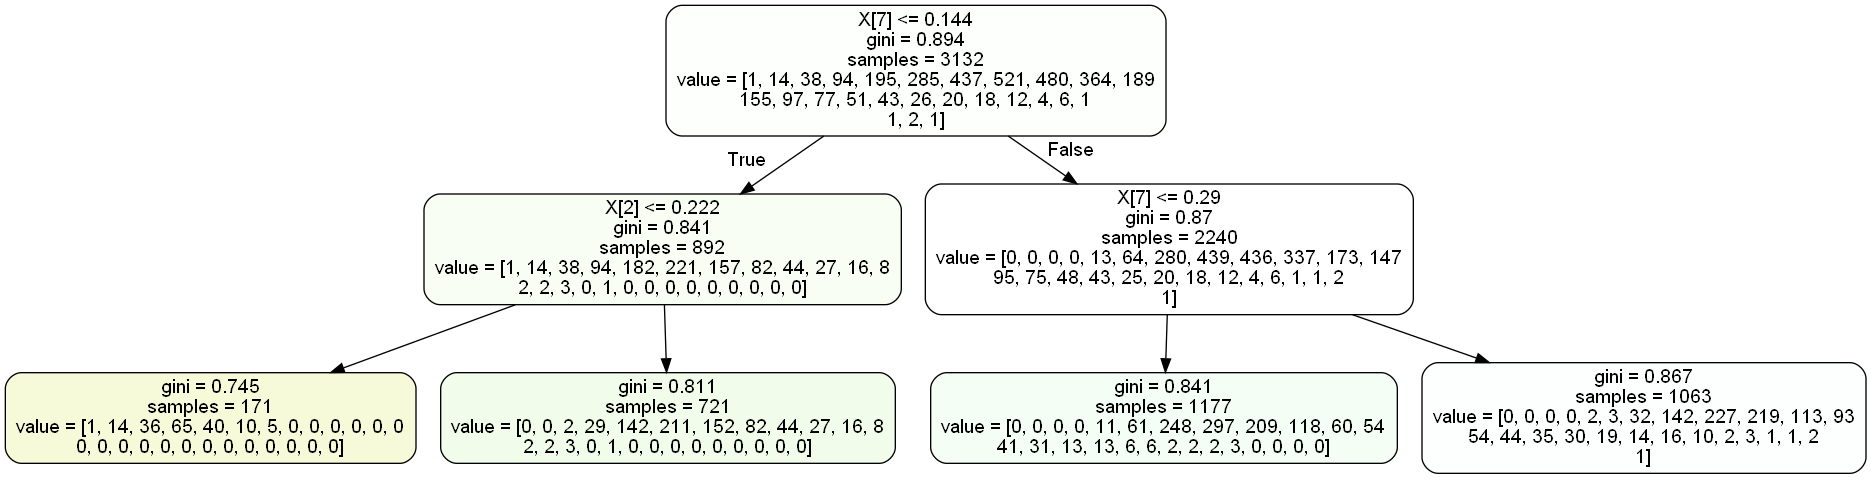

In [379]:
feature_name=list(X.columns)
class_name = list(y_train.unique())
# create a dot_file which stores the tree structure
dot_data = export_graphviz(clf,rounded = True, filled = True)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('tree.png')
# show graph
Image(graph.create_png())

###  Hyperparameter  tunings doesn't  always improves the accuracy  but more than 90% it will increse the accuracy, but not 100%.

In [380]:
# it can be seen that gini criterion is used , maximum depth used is 3, min_samples_leaf used is 11 and min_sample_split used is 4.
# above these parameters are in the range which has been provided.
# different range gives different results.

In [381]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth =3, min_samples_leaf=11, min_samples_split = 4)
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.2660287081339713

In [382]:
# from the result we can see that we can increase the accuracy by increasing the range.
# as the accuracy is increased from 19.04 % to 26.6 %.

In [383]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    'criterion': ['gini','entropy'],
    'max_depth' : range(5,20,4),
    'min_samples_leaf' : range(5,20,4),
    'min_samples_split': range(6,30,4)
}


# for large dataset we have to increase the range also.

In [384]:
grid_search = GridSearchCV(estimator=clf,
                          param_grid=grid_param,
                          cv=5,
                          n_jobs =-1)

# cv=5   five times cross validation and try to find the best combination.
# n_jobs=-1   it will engage  all the cores of the system to find the grid params so that it will decrese the time


In [385]:
grid_search.fit(x_train,y_train)

# to pass the training data.

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=3,
                                              min_samples_leaf=11,
                                              min_samples_split=4),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(5, 20, 4),
                         'min_samples_leaf': range(5, 20, 4),
                         'min_samples_split': range(6, 30, 4)})

In [386]:
# to find the best parameters

best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 13, 'min_samples_split': 6}


###  Hyperparameter  tunings doesn't  always improves the accuracy  but more than 90% it will increse the accuracy, but not 100%.

In [387]:
# it can be seen that gini criterion is used , maximum depth used is 3, min_samples_leaf used is 11 and min_sample_split used is 4.
# above these parameters are in the range which has been provided.
# different range gives different results.

In [388]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth =9, min_samples_leaf=17, min_samples_split = 4)
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.22679425837320574

In [389]:
# we can see that we can't increase the result by hyperparameter tuning.

In [390]:
y_pred = clf.predict(x_test)

In [391]:
accuracy_score(y_test,y_test)

1.0

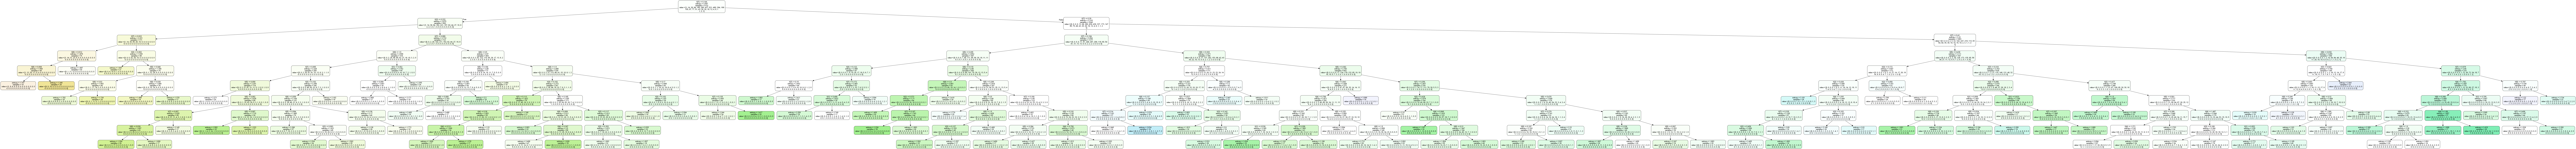

In [392]:
feature_name=list(X.columns)
class_name = list(y_train.unique())
# create a dot_file which stores the tree structure
dot_data = export_graphviz(clf,rounded = True, filled = True)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('tree.png')
# show graph
Image(graph.create_png())

In [393]:
#importing the required libraires

In [394]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [395]:
sc = StandardScaler()

In [396]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [397]:

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [398]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.41      0.37      0.39        19
           5       0.40      0.29      0.33        21
           6       0.33      0.30      0.31        64
           7       0.32      0.35      0.34       106
           8       0.31      0.36      0.33       131
           9       0.26      0.36      0.30       168
          10       0.22      0.29      0.25       154
          11       0.20      0.21      0.21       123
          12       0.21      0.10      0.14        78
          13       0.12      0.10      0.11        48
          14       0.12      0.03      0.05        29
          15       0.12      0.04      0.06        26
          16       0.12      0.06      0.08        16
          17       0.00      0.00      0.00        15
          18       0.00      0.00      0.00        16
          19       0.00    

In [399]:
# random forest gives accuracy of 27%%

In [400]:
print(confusion_matrix(y_test, pred_rfc))

[[ 0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  4  7  2  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  4  6  5  5  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  3 19 30  8  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  3  3 21 37 27  9  5  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  3 22 47 41 11  4  0  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  7 33 61 42 16  5  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  7 16 53 45 26  2  2  1  1  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2 10 33 37 26  9  5  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  6 22 14 21  8  2  2  0  0  1  0  0  1  0  0  0  0]
 [ 0  0  0  0  1  1  3  7 11 17  3  5  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  4  7  5  2  3  1  1  3  1  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  2  2 10  3  0  4  1  1  1  0  0  0  1  0  0

In [401]:
from sklearn.linear_model import SGDClassifier


sgd = SGDClassifier(penalty=None)
sgd.fit(X_train, y_train)
pred_sgd = sgd.predict(X_test)

In [402]:
print(classification_report(y_test, pred_sgd))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        19
           5       0.25      0.29      0.27        21
           6       0.26      0.47      0.34        64
           7       0.00      0.00      0.00       106
           8       0.09      0.12      0.11       131
           9       0.23      0.44      0.30       168
          10       0.11      0.18      0.14       154
          11       0.31      0.07      0.11       123
          12       0.00      0.00      0.00        78
          13       0.07      0.10      0.09        48
          14       0.00      0.00      0.00        29
          15       0.12      0.12      0.12        26
          16       0.16      0.19      0.17        16
          17       0.00      0.00      0.00        15
          18       0.00      0.00      0.00        16
          19       0.00    

In [403]:
#sgd classifier gives accuracy of 21%

In [404]:
svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

In [405]:
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.83      0.26      0.40        19
           5       0.29      0.29      0.29        21
           6       0.34      0.25      0.29        64
           7       0.31      0.34      0.33       106
           8       0.34      0.40      0.36       131
           9       0.25      0.54      0.34       168
          10       0.17      0.24      0.20       154
          11       0.22      0.20      0.21       123
          12       0.00      0.00      0.00        78
          13       0.00      0.00      0.00        48
          14       0.00      0.00      0.00        29
          15       0.00      0.00      0.00        26
          16       0.00      0.00      0.00        16
          17       0.00      0.00      0.00        15
          18       0.00      0.00      0.00        16
          19       0.00    

In [406]:
# svc gives accuracy of 26%

In [407]:
#Finding best parameters for our SVC model
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)

In [408]:
grid_svc.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [409]:
#Best parameters for our svc model
grid_svc.best_params_

{'C': 1.3, 'gamma': 0.1, 'kernel': 'rbf'}

In [410]:
# c is a hypermeter which is set before training the model and used to control error.
# gamma is also a hypermeter which is set before training the model and used to give curvature weight of the boundary decision.

In [411]:
#Let's run our SVC again with the best parameters.
svc2 = SVC(C = 1.3, gamma =  0.1, kernel= 'rbf')
svc2.fit(X_train, y_train)
pred_svc2 = svc2.predict(X_test)
print(classification_report(y_test, pred_svc2))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.86      0.32      0.46        19
           5       0.30      0.29      0.29        21
           6       0.34      0.27      0.30        64
           7       0.31      0.35      0.33       106
           8       0.35      0.41      0.38       131
           9       0.25      0.53      0.34       168
          10       0.17      0.26      0.21       154
          11       0.24      0.19      0.21       123
          12       0.33      0.01      0.02        78
          13       0.00      0.00      0.00        48
          14       0.00      0.00      0.00        29
          15       0.00      0.00      0.00        26
          16       0.00      0.00      0.00        16
          17       0.00      0.00      0.00        15
          18       0.00      0.00      0.00        16
          19       0.00    

In [412]:
# svc2 gives accuracy of 26% which is best till now.

In [413]:
# but if we increase the value of gamma  we get better accuracy


In [414]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score

In [415]:
#Now lets try to do some evaluation for random forest model using cross validation.
rfc_eval = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 10)
rfc_eval.mean()

0.24136973199568587

In [ ]:
# Evaluating performance of the machine learning model that have been built.
# performance of our model is done using some evaluation metrics.

In [416]:
from sklearn.metrics import mean_squared_error
print('Root Mean Squared Error is: ', np.sqrt(mean_squared_error(y_test, y_pred)))

Root Mean Squared Error is:  2.6691575288610445


## Conclusion

* from all the analysis it can be observed that the no. of rings tells that as the no. of rings increases the age, weight and size of the abalone increases.
* The weight and hieght of abalone varies accordingly to age until the adult age, after adult life size and weight stops and after 16.5 years there is 15 rings present but these measurements aren't correlated.
* The size of male and female abalone is approximately same.
* The size of abalone is proportonal to weight.